In [38]:
import numpy as np
import matplotlib.pyplot as plt
from pybaselines.utils import gaussian
from pybaselines import whittaker
from pybaselines.classification import fabc

def create_plots():
    fig, axes = plt.subplots(
        3, 2, tight_layout={'pad': 0.1, 'w_pad': 0, 'h_pad': 0},
        gridspec_kw={'wspace': 0, 'hspace': 0}
    )
    axes = axes.ravel()
    for ax in axes:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.tick_params(
            which='both', labelbottom=False, labelleft=False,
            labeltop=False, labelright=False
        )
    return fig, axes


x = np.linspace(1, 1000, 500)
signal = (
    gaussian(x, 6, 180, 5)
    + gaussian(x, 8, 350, 10)
    + gaussian(x, 6, 550, 5)
    + gaussian(x, 9, 800, 10)
)
signal_2 = (
    gaussian(x, 9, 100, 12)
    + gaussian(x, 15, 400, 8)
    + gaussian(x, 13, 700, 12)
    + gaussian(x, 9, 880, 8)
)
signal_3 = (
    gaussian(x, 8, 150, 10)
    + gaussian(x, 20, 120, 12)
    + gaussian(x, 16, 300, 20)
    + gaussian(x, 12, 550, 5)
    + gaussian(x, 20, 750, 12)
    + gaussian(x, 18, 800, 18)
    + gaussian(x, 15, 830, 12)
)
noise = np.random.default_rng(1).normal(0, 0.2, x.size)
linear_baseline = 3 + 0.01 * x
exponential_baseline = 5 + 15 * np.exp(-x / 400)
gaussian_baseline = 5 + gaussian(x, 20, 500, 500)

baseline_1 = linear_baseline
baseline_2 = gaussian_baseline
baseline_3 = exponential_baseline
baseline_4 = 10 - 0.005 * x + gaussian(x, 5, 850, 200)
baseline_5 = linear_baseline + 20

y1 = signal * 2 + baseline_1 + 5 * noise
y2 = signal + signal_2 + signal_3 + baseline_2 + noise
y3 = signal + signal_2 + baseline_3 + noise
y4 = signal + + signal_2 + baseline_4 + noise * 0.5
y5 = signal * 2 - signal_2 + baseline_5 + noise

baselines = baseline_1, baseline_2, baseline_3, baseline_4, baseline_5
data = (y1, y2, y3, y4, y5)

'''

for i, (ax, y) in enumerate(zip(*create_data())):
    if i == 1:
        lam = 1e6
        p = 0.01
    elif i == 4:
        lam = 1e8
        p = 0.5
    else:
        lam = 1e5
        p = 0.01
    baseline = whittaker.asls(y, lam=lam, p=p)
    ax.plot(baseline[0], 'g--')'''

"\n\nfor i, (ax, y) in enumerate(zip(*create_data())):\n    if i == 1:\n        lam = 1e6\n        p = 0.01\n    elif i == 4:\n        lam = 1e8\n        p = 0.5\n    else:\n        lam = 1e5\n        p = 0.01\n    baseline = whittaker.asls(y, lam=lam, p=p)\n    ax.plot(baseline[0], 'g--')"

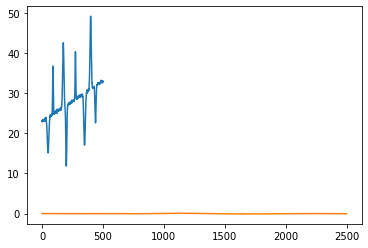

In [39]:
lam = 1e8
p = 0.5
baseline = whittaker.asls(y, lam=lam, p=p)
plt.plot(y5)
plt.plot(baseline[0])

In [40]:
%load_ext autoreload
%autoreload 2

In [41]:

import os
import json

# Data Wrangling
import h5py
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from skimage.transform import resize

from tracking_data.dataset import Dataset_TailTracking
from preprocessing.smoothing import clean_using_pca

In [42]:

data_folder='H://HeadRestrainedDataset//all_csv//'
protocol_name='all_csv'
path='H://HeadRestrainedDataset//all_csv//'

filelist=[]
for file in os.listdir(path):
    if file.endswith(".csv"):
        filelist.append(os.path.join(path, file))


In [43]:
filelist = ['2021_07_26_BDLC_resnet50_Zebrafishsep28shuffle1_1030000']
df = pd.read_csv('C://Users//adrien//Downloads//'+filelist[0]+'.csv')
#df = pd.read_csv(filelist[0])


C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [44]:
df.head(10)

,scorer,DLC_resnet50_Zebrafishsep28shuffle1_1030000,DLC_resnet50_Zebrafishsep28shuffle1_1030000.1,DLC_resnet50_Zebrafishsep28shuffle1_1030000.2,DLC_resnet50_Zebrafishsep28shuffle1_1030000.3,DLC_resnet50_Zebrafishsep28shuffle1_1030000.4,DLC_resnet50_Zebrafishsep28shuffle1_1030000.5,DLC_resnet50_Zebrafishsep28shuffle1_1030000.6,DLC_resnet50_Zebrafishsep28shuffle1_1030000.7,DLC_resnet50_Zebrafishsep28shuffle1_1030000.8,...,DLC_resnet50_Zebrafishsep28shuffle1_1030000.29,DLC_resnet50_Zebrafishsep28shuffle1_1030000.30,DLC_resnet50_Zebrafishsep28shuffle1_1030000.31,DLC_resnet50_Zebrafishsep28shuffle1_1030000.32,DLC_resnet50_Zebrafishsep28shuffle1_1030000.33,DLC_resnet50_Zebrafishsep28shuffle1_1030000.34,DLC_resnet50_Zebrafishsep28shuffle1_1030000.35,DLC_resnet50_Zebrafishsep28shuffle1_1030000.36,DLC_resnet50_Zebrafishsep28shuffle1_1030000.37,DLC_resnet50_Zebrafishsep28shuffle1_1030000.38
0,bodyparts,head,head,head,headend,headend,headend,tailbeegining,tailbeegining,tailbeegining,...,t7,t8,t8,t8,t9,t9,t9,tailtip,tailtip,tailtip
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,173.74493408203125,2.5264930725097656,0.9999634027481079,177.50311279296875,40.53830337524414,0.9999827146530151,180.14688110351562,80.92289733886719,0.9999872446060181,...,0.9996798038482666,176.68179321289062,254.8188018798828,0.9993079900741577,177.09207153320312,275.1826171875,0.9997287392616272,182.64173889160156,295.271728515625,0.9984434247016907
3,1,173.16305541992188,2.995912790298462,0.999984622001648,177.69546508789062,40.429813385009766,0.999985933303833,180.41571044921875,80.9039306640625,0.9999858140945435,...,0.9996985197067261,176.85345458984375,255.031494140625,0.9993765950202942,177.2431640625,275.27557373046875,0.999758780002594,182.84620666503906,295.1423034667969,0.9986070990562439
4,2,172.60508728027344,2.4854965209960938,0.9999779462814331,177.29257202148438,40.16485595703125,0.9999830722808838,180.1298370361328,80.91189575195312,0.9999862909317017,...,0.9997009038925171,176.75717163085938,254.4809112548828,0.9992639422416687,177.07594299316406,274.5133361816406,0.9997525811195374,181.68043518066406,294.8653259277344,0.9988294243812561
5,3,172.44239807128906,2.889864206314087,0.9999850988388062,176.99266052246094,40.33701705932617,0.9999781847000122,179.85438537597656,81.17063903808594,0.99998939037323,...,0.999688982963562,176.80337524414062,254.1546630859375,0.9991748929023743,177.02468872070312,274.2779846191406,0.9997381567955017,181.80105590820312,294.4486083984375,0.9989829659461975
6,4,173.0550079345703,3.141098737716675,0.9999884366989136,177.10379028320312,40.811363220214844,0.9999833106994629,179.919677734375,81.26020812988281,0.9999915361404419,...,0.9996722936630249,176.7528839111328,253.94712829589844,0.9991021156311035,176.91856384277344,274.0540466308594,0.9997316002845764,181.05715942382812,294.441162109375,0.9990799427032471
7,5,172.4975128173828,3.2889111042022705,0.9999879598617554,176.92758178710938,40.71115493774414,0.9999808073043823,179.89537048339844,81.26753997802734,0.9999903440475464,...,0.9996896982192993,176.7609405517578,254.11488342285156,0.9991472959518433,176.98902893066406,274.2093505859375,0.9997236132621765,181.2839813232422,294.53466796875,0.9990200996398926
8,6,172.27374267578125,3.0770843029022217,0.9999861717224121,176.9464111328125,40.482627868652344,0.9999808073043823,180.0072784423828,81.187255859375,0.999990701675415,...,0.9996830224990845,176.83389282226562,254.4132843017578,0.9992238283157349,177.09027099609375,274.4541015625,0.9997283816337585,181.51773071289062,294.6471862792969,0.9990037083625793
9,7,172.28712463378906,3.0169677734375,0.999987006187439,177.1776885986328,40.66775894165039,0.9999836683273315,180.1755828857422,81.44386291503906,0.9999916553497314,...,0.999695897102356,176.74070739746094,254.51368713378906,0.9992235898971558,177.00048828125,274.6125183105469,0.9997171759605408,181.64837646484375,294.761138916015

In [45]:
tail_x_col = ['DLC_resnet50_Zebrafishsep28shuffle1_1030000.6','DLC_resnet50_Zebrafishsep28shuffle1_1030000.9','DLC_resnet50_Zebrafishsep28shuffle1_1030000.12',
              'DLC_resnet50_Zebrafishsep28shuffle1_1030000.15','DLC_resnet50_Zebrafishsep28shuffle1_1030000.18','DLC_resnet50_Zebrafishsep28shuffle1_1030000.21',
              'DLC_resnet50_Zebrafishsep28shuffle1_1030000.24','DLC_resnet50_Zebrafishsep28shuffle1_1030000.27','DLC_resnet50_Zebrafishsep28shuffle1_1030000.30',
              'DLC_resnet50_Zebrafishsep28shuffle1_1030000.33','DLC_resnet50_Zebrafishsep28shuffle1_1030000.36']

tail_y_col = ['DLC_resnet50_Zebrafishsep28shuffle1_1030000.7','DLC_resnet50_Zebrafishsep28shuffle1_1030000.10','DLC_resnet50_Zebrafishsep28shuffle1_1030000.13',
              'DLC_resnet50_Zebrafishsep28shuffle1_1030000.16','DLC_resnet50_Zebrafishsep28shuffle1_1030000.19','DLC_resnet50_Zebrafishsep28shuffle1_1030000.22',
              'DLC_resnet50_Zebrafishsep28shuffle1_1030000.25','DLC_resnet50_Zebrafishsep28shuffle1_1030000.28','DLC_resnet50_Zebrafishsep28shuffle1_1030000.31',
              'DLC_resnet50_Zebrafishsep28shuffle1_1030000.34','DLC_resnet50_Zebrafishsep28shuffle1_1030000.37']



In [46]:
print([df[x].iloc[0] for x in tail_x_col])
print([df[x].iloc[1] for x in tail_x_col])
print([df[x].iloc[0] for x in tail_y_col])
print([df[x].iloc[1] for x in tail_y_col])

['tailbeegining', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 'tailtip']
['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x']
['tailbeegining', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 'tailtip']
['y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y']


In [47]:
tail_x = np.array([df[x].iloc[2:].values.astype('float') for x in tail_x_col])
tail_y = np.array([df[x].iloc[2:].values.astype('float') for x in tail_y_col])

In [13]:
tail_x.shape,tail_y.shape

((11, 950003), (11, 950003))

In [14]:
vect_segment = np.concatenate((np.diff(tail_x,axis=0)[:,:,np.newaxis],np.diff(tail_y,axis=0)[:,:,np.newaxis]),axis=2)
vect_segment = np.swapaxes(vect_segment,0,2)


In [15]:
vect_segment.shape

(2, 950003, 10)

In [16]:

def compute_angle_between_vect(v1, v2):
    dot = np.einsum('ijk,ijk->ij',[v1,v1,v2],[v2,v1,v2])
    cos_= dot[0,:]
    sin_= np.cross(v1,v2)
    angle_= np.arctan2(sin_,cos_)
    return angle_

In [17]:
relative_angle = np.zeros((vect_segment.shape[1],9))
for i in range(9):
    relative_angle[:,i] = compute_angle_between_vect(vect_segment[:,:,i].T,vect_segment[:,:,i+1].T)
    
tail_angle=np.cumsum(relative_angle,1)

In [18]:
relative_angle.shape

(950003, 9)

In [19]:
tail_angle.shape

(950003, 9)

(-2.0, 2.0)

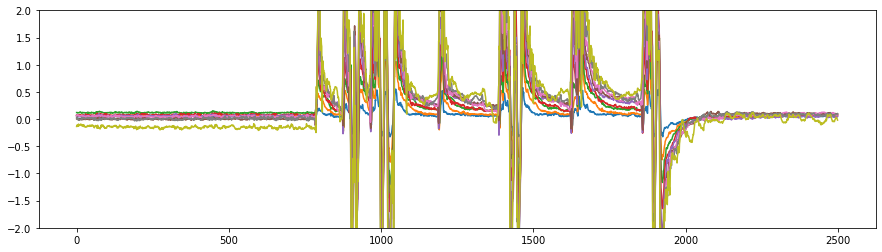

In [112]:
IdSt = np.random.randint(tail_angle.shape[0])
Duration = 250*10
plt.figure(figsize=(15,4))
plt.plot(tail_angle[IdSt:IdSt+Duration,:])
plt.ylim(-2,2)

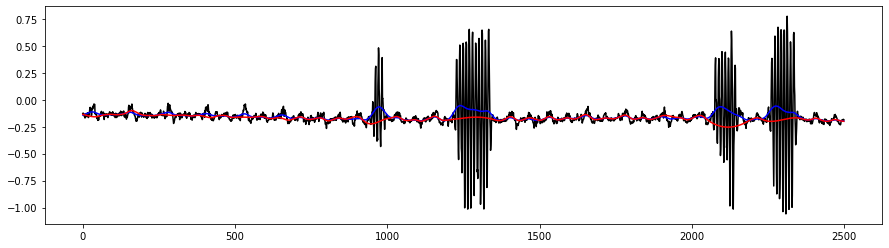

In [111]:

y = tail_angle[IdSt:IdSt+Duration,-1]
baseline1 = whittaker.asls(y, lam=1e4, p=0.5)
baseline2 = fabc(y, lam=1e4, scale=7, num_std = 3, min_length=10,diff_order =2)

plt.figure(figsize=(15,4))
plt.plot(y,'k')
plt.plot(baseline1[0],'b')
plt.plot(baseline2[0],'r')

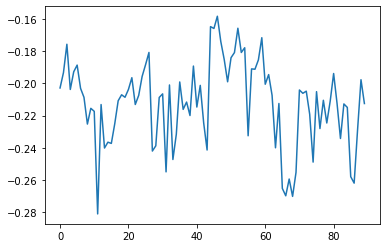

In [23]:
plt.plot(y[0:90])

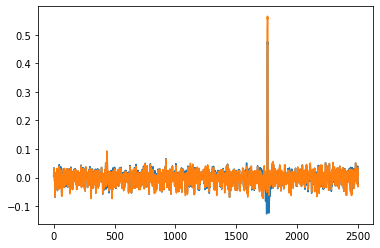

In [24]:
plt.plot(y-baseline1[0])
plt.plot(y-baseline2[0])


In [1]:

plt.figure(figsize=(15,4))
plt.plot(tail_angle[:,-1])

NameError: name 'plt' is not defined

In [15]:
filelist = ['2021-10-07-nefma-7dpf-f1-all_logs']

Tensor = np.zeros((3500,10,0))
stop = False
df = pd.read_csv('H://HeadRestrainedDataset//all_csv//'+filelist[0]+'.csv')
#df = pd.read_csv(filelist[0])

NumSegment = 16

relative_tail_angle = df[['angle'+str(i) for i in range(NumSegment)]]
relative_tail_angle = relative_tail_angle.values

cumul_tail_angle=np.cumsum(relative_tail_angle,1)
cumul_tail_angle[cumul_tail_angle<-10]=np.nan

tracking_data = Dataset_TailTracking(fps=700,tail_angle=cumul_tail_angle)

tail_angle was rescaled to have size to have 10 segments


In [20]:
tracking_data.tracking_type

'tail'

# Create Pipeline

In [25]:
from preprocessing.smoothing import create_preprocess
from sparse_coding.sparse_coding import create_sparse_coder
from segmentation.segment import create_segmentation_from_code
from classification.classify import create_classifier
from classification.template_bouts import Knn_training_dataset

In [26]:
preprocess = create_preprocess(limit_na=5,num_pcs=3)


In [28]:
help(preprocess)

Help on function preprocess in module preprocessing.smoothing:

preprocess(tail_angle)



In [ ]:
def create_pipeline(preprocess,sparse_coder,segment_from_code,classifier):

    def pipeline(tail_angle):

        tail_angle_clean = preprocess(tail_angle)
        z,tail_angle_hat = sparse_coder(tail_angle_clean)
        onset,offset,bouts_array = segment_from_code(z,tail_angle)
        bout_cat = classifier(bouts_array)

        return tail_angle_clean,z,tail_angle_hat,onset,offset,bouts_array,bout_cat

    return pipeline

In [48]:
Dict = np.load('./sparse_coding/Dict_OptimizedHeadRestrained.npz')


In [57]:
print(Dict.files)

['Dict', 'id_slow', 'id_fast', 'id_turn', 'id_struggle']


In [60]:
Dict['Dict'].shape

(150, 7, 10)

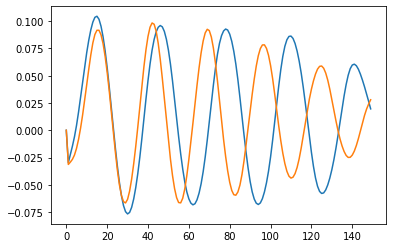

In [63]:
plt.plot(Dict['Dict'][:,-1,0:2])

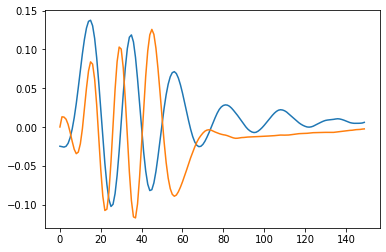

In [64]:
plt.plot(Dict['Dict'][:,-1,2:4])

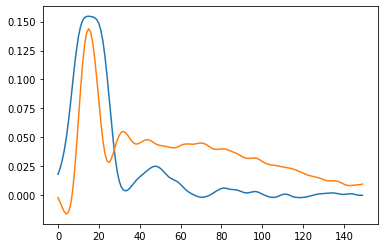

In [66]:
plt.plot(Dict['Dict'][:,-1,4:6])


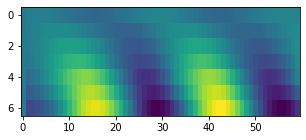

In [96]:
plt.figure(figsize=(5,2))
plt.imshow(Dict['Dict'][:60,:,1].T,aspect='auto')


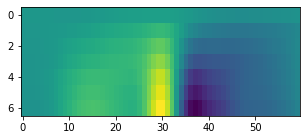

In [105]:
plt.figure(figsize=(5,2))
plt.imshow(Dict['Dict'][:60,:,9].T,aspect='auto')


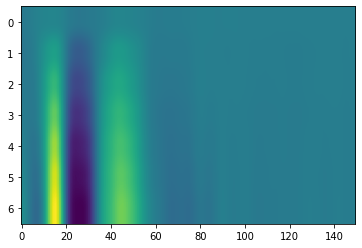

In [74]:
plt.imshow(Dict['Dict'][:,:,7].T,aspect='auto')


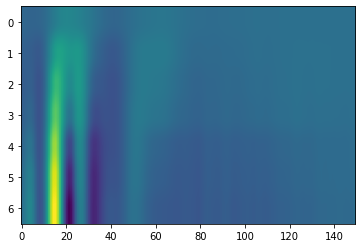

In [75]:
plt.imshow(Dict['Dict'][:,:,8].T,aspect='auto')


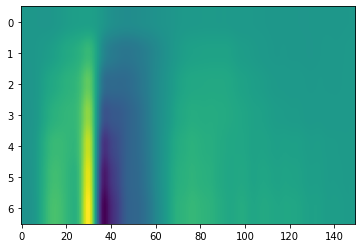

In [76]:
plt.imshow(Dict['Dict'][:,:,9].T,aspect='auto')


NameError: name 'generate_template_bouts' is not defined

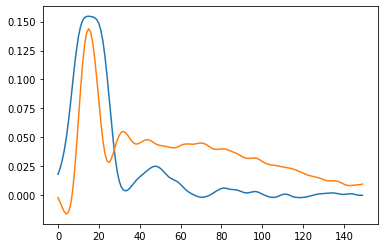

In [65]:
templates_flat,templates_labels,NameCat,Duration_after_Downsampling = generate_template_bouts(format='tail',template_duration = 140,target_fps=700,ExludeCaptureSwim=True,delays=np.arange(10,120,3))
Dict = np.load('./sparse_coding/3atomsDictTu.npy')


In [ ]:
preprocess = create_preprocess(limit_na=5,num_pcs=3)
sparse_coder = create_sparse_coder(Dict,lmbda=0.01,gamma=0.05,mu=0.05,Whn=60)
segment_from_code = create_segmentation_from_code(Min_Code_Ampl=1,SpikeDist=120,Bout_Duration=140)
classifier = create_classifier(templates_flat,templates_labels,n_neighbors=5)
pipeline = create_pipeline(preprocess,sparse_coder,segment_from_code,classifier)

In [ ]:
#  Runing full pipeline
tail_angle_clean,z,tail_angle_hat,onset,offset,bouts_array,bout_cat = pipeline(tail_angle)

Itn   Fnc       DFid      Regℓ1     RegLat    RegSelf   r         s         ρ       
------------------------------------------------------------------------------------
   0  5.87e+03  4.87e+03  2.15e+04  8.75e+03  6.87e+03  4.17e-01  1.21e+01  1.50e+00
   1  7.44e+03  4.10e+03  3.29e+04  3.49e+04  2.54e+04  3.53e-01  2.05e+00  1.50e+00
   2  9.00e+03  4.20e+03  3.23e+04  5.20e+04  3.74e+04  5.38e-01  3.64e-01  6.06e-01
   3  8.96e+03  5.03e+03  2.28e+04  4.23e+04  3.16e+04  5.52e-01  2.42e-01  7.17e-01
   4  8.68e+03  5.20e+03  1.85e+04  3.71e+04  2.88e+04  3.92e-01  1.99e-01  1.06e+00
   5  8.39e+03  5.16e+03  1.62e+04  3.15e+04  3.00e+04  1.86e-01  2.49e-01  1.44e+00
   6  8.74e+03  5.04e+03  1.75e+04  3.43e+04  3.63e+04  1.63e-01  1.50e-01  1.21e+00
   7  8.58e+03  5.09e+03  1.60e+04  3.06e+04  3.61e+04  1.43e-01  1.34e-01  1.21e+00
   8  8.47e+03  5.16e+03  1.48e+04  2.81e+04  3.51e+04  1.28e-01  9.23e-02  1.21e+00
   9  8.39e+03  5.20e+03  1.41e+04  2.58e+04  3.52e+04  8.65e-02 

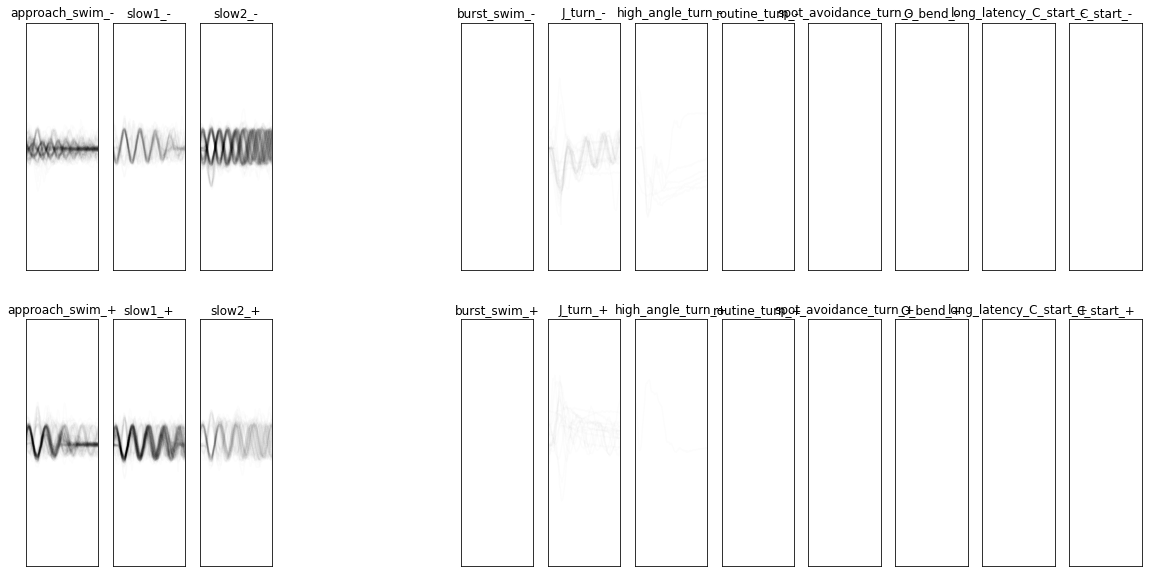

In [ ]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique((templates_labels))):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    
    id = np.where(bout_cat==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(bouts_array[id,:,-1].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    ax0.set_ylim(-3.6,3.6)
    
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


NameError: name 'bout_cat' is not defined

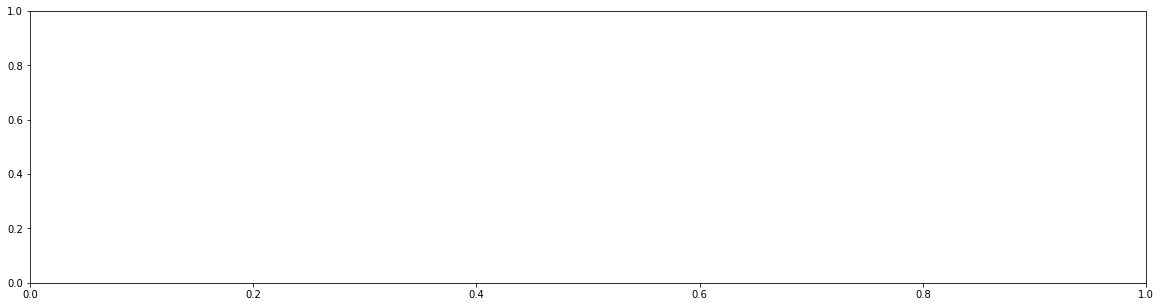

In [37]:
fig, ax = plt.subplots(facecolor='white',figsize=(20,5)) 

plt.hist(bout_cat,np.linspace(-0.5,25.5,27))
plt.xticks(np.arange(26),NameCat, rotation='vertical')
plt.show()

# Make Figure 2

In [ ]:
from scipy.signal import find_peaks
z_normalized = np.copy(z)
#for i in range(z.shape[1]):
#    z_normalized[:,i] = z[:,i]/np.std(z[:,i])

z_max = np.max(np.abs(z_normalized),axis=1)
peaks, _ = find_peaks(z_max, height=1,distance=120)
peaks_bin = np.zeros(T)
peaks_bin[peaks]=1

## For each peak find next peak or gap in peaks...
Bout_Duration = 120
kernel = np.ones(Bout_Duration)
filtered_forward = np.convolve(kernel,peaks_bin, mode='full')[:peaks_bin.shape[0]]
is_tail_active = 1.0*(filtered_forward>0)#*(filtered_backward>0)

In [ ]:

Duration = 700*7
IdSt = np.random.randint(z.shape[0])
IdEd = IdSt + Duration
t = np.linspace(0,Duration/700,Duration)
sub_onset,sub_offset,sub_i= [],[],[]

for i,(on_,off_) in enumerate(zip(onset,offset)):
    if (on_>IdSt)&(off_<IdEd):
        sub_onset.append(on_)
        sub_offset.append(off_)
        sub_i.append(i)

sub_peaks = np.where(peaks_bin[IdSt:IdEd]==1)[0]
sub_i = np.array(sub_i)
print(len(sub_peaks))

13


In [ ]:
templates_flat,templates_labels,NameCat,Duration_after_Downsampling = generate_template_bouts(format='tail',template_duration = 140,target_fps=700,ExludeCaptureSwim=True,delays=np.arange(-10,10,1))


In [ ]:
## For each bous in interval find nearest neighbor

from sklearn.neighbors import KNeighborsClassifier

print(bouts_array.shape,len(onset))

sub_bouts_array = bouts_array[sub_i]
print(sub_bouts_array.shape)


# FLATTEN ARRAY:
sub_bouts_array = sub_bouts_array[:,:,:]
sub_bouts_array_flat = np.reshape(np.swapaxes(sub_bouts_array, 1, 2),(sub_bouts_array.shape[0],sub_bouts_array.shape[1]*sub_bouts_array.shape[2]))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(templates_flat, templates_labels)
res = knn.kneighbors(sub_bouts_array_flat)
Nearest_bouts = templates_flat[res[1][:,0],140*6:]


(1103, 140, 7) 1103
(13, 140, 7)


In [ ]:
from matplotlib.patches import Rectangle

(0.0, 7.0)

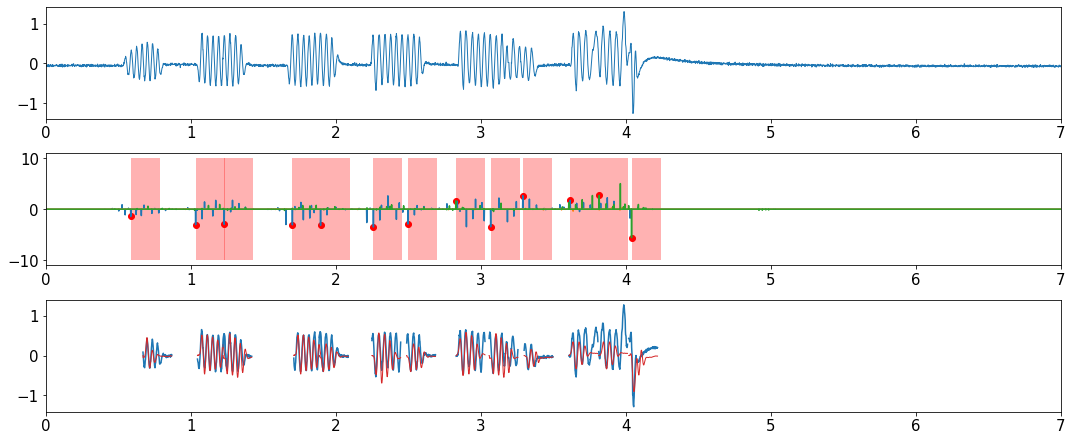

In [ ]:

fig, ax = plt.subplots(facecolor='white',figsize=(15,10),tight_layout=True,sharex=True)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=15)

G = gridspec.GridSpec(5,1)

ax = plt.subplot(G[0])
#ax.plot(t,tail_angle[IdSt:IdEd,7],'k',lw=1)
ax.plot(t,tail_angle_clean[IdSt:IdEd,7],lw=1)
ax.set_xlim(0,Duration/700)

ax = plt.subplot(G[1])
ax.plot(t,z[IdSt:IdEd,:])
y =-(1-2*(np.max((z[IdSt:IdEd]),axis=1)>np.max(-(z[IdSt:IdEd]),axis=1)))*np.max(np.abs(z[IdSt:IdEd]),axis=1)*peaks_bin[IdSt:IdEd]
ax.scatter(t[sub_peaks],y[sub_peaks],color = 'r')
for p in sub_peaks:
    ax.add_patch(Rectangle((t[p],-10),140/700,20,facecolor="red",alpha=0.3))
#ax.vlines(t[sub_peaks],-10,10)
ax.set_xlim(0,Duration/700)

ax = plt.subplot(G[2])
for i,(on_,off_) in enumerate(zip(sub_onset,sub_offset)):
    ax.plot((np.arange(on_,off_)-IdSt)/700,tail_angle_clean[on_:off_,6],'tab:blue')
    off_ = on_+140
    ax.plot((np.arange(on_,off_)-IdSt)/700,Nearest_bouts[i,:],'tab:red',lw=1)
 
ax.set_xlim(0,Duration/700)

